<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Goal" data-toc-modified-id="Goal-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#NO-=-20" data-toc-modified-id="NO-=-20-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>NO = 20</a></span><ul class="toc-item"><li><span><a href="#Trying-to-make-sense-of-the-drop-in-balance" data-toc-modified-id="Trying-to-make-sense-of-the-drop-in-balance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Trying to make sense of the drop in balance</a></span></li></ul></li><li><span><a href="#NO-=-100" data-toc-modified-id="NO-=-100-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>NO = 100</a></span></li><li><span><a href="#NO-=-500" data-toc-modified-id="NO-=-500-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>NO = 500</a></span></li></ul></div>

# Conclusion

- Preliminary analysis seems to confirm the hypo that we indeed have convergence if we carry over the step size. However, might be very inefficient as we keep kicking away from the optimal point. Therefore line search should be implemented
- The huge drop was understood as being a by product of the initialization routine. Enabled us to also find a mistake in the way we computed it. 

Conclusions written up in two GGdocs. 


# Goal

The hypothesis is that we were always starting with a large step size in the inner iterations, and therefore we get kicked out from the optimal region. 

Therefore, Before my meeting with Marco Last week, I artificially boosted the step size law to 1/k^1.5 which resulted in very strong convergence. 

Here I want to do it much more smoothly with a few graph instances to check if yes or no we recover the results. 

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
import pandas as pd

from amod_ed.result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list
from amod_ed.result_analysis import plot_stop_and_cost

In [2]:
subfolder='unstucking_balance'

# NO = 20

Here we do not carry over the step size. It is essentially to investigate why we have such a big drop in balance at the very first iteration. 

In [14]:
n_nodes=10

In [4]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [15]:
print(os.listdir(path))

['init_nearest_with_step.pkl', 'ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'no_to_100_withCarriedOverStepSize.pkl', 'no_to_500_withCarriedOverStepSize.pkl', 'ni_to_5000.pkl', 'init_nearest_with_step_decrease.pkl', 'init_nearest.pkl']


In [6]:
filename=os.listdir(path)[-1]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

init_nearest.pkl


In [7]:
params

{'L': 10000,
 'ni': 1000,
 'no': 20,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

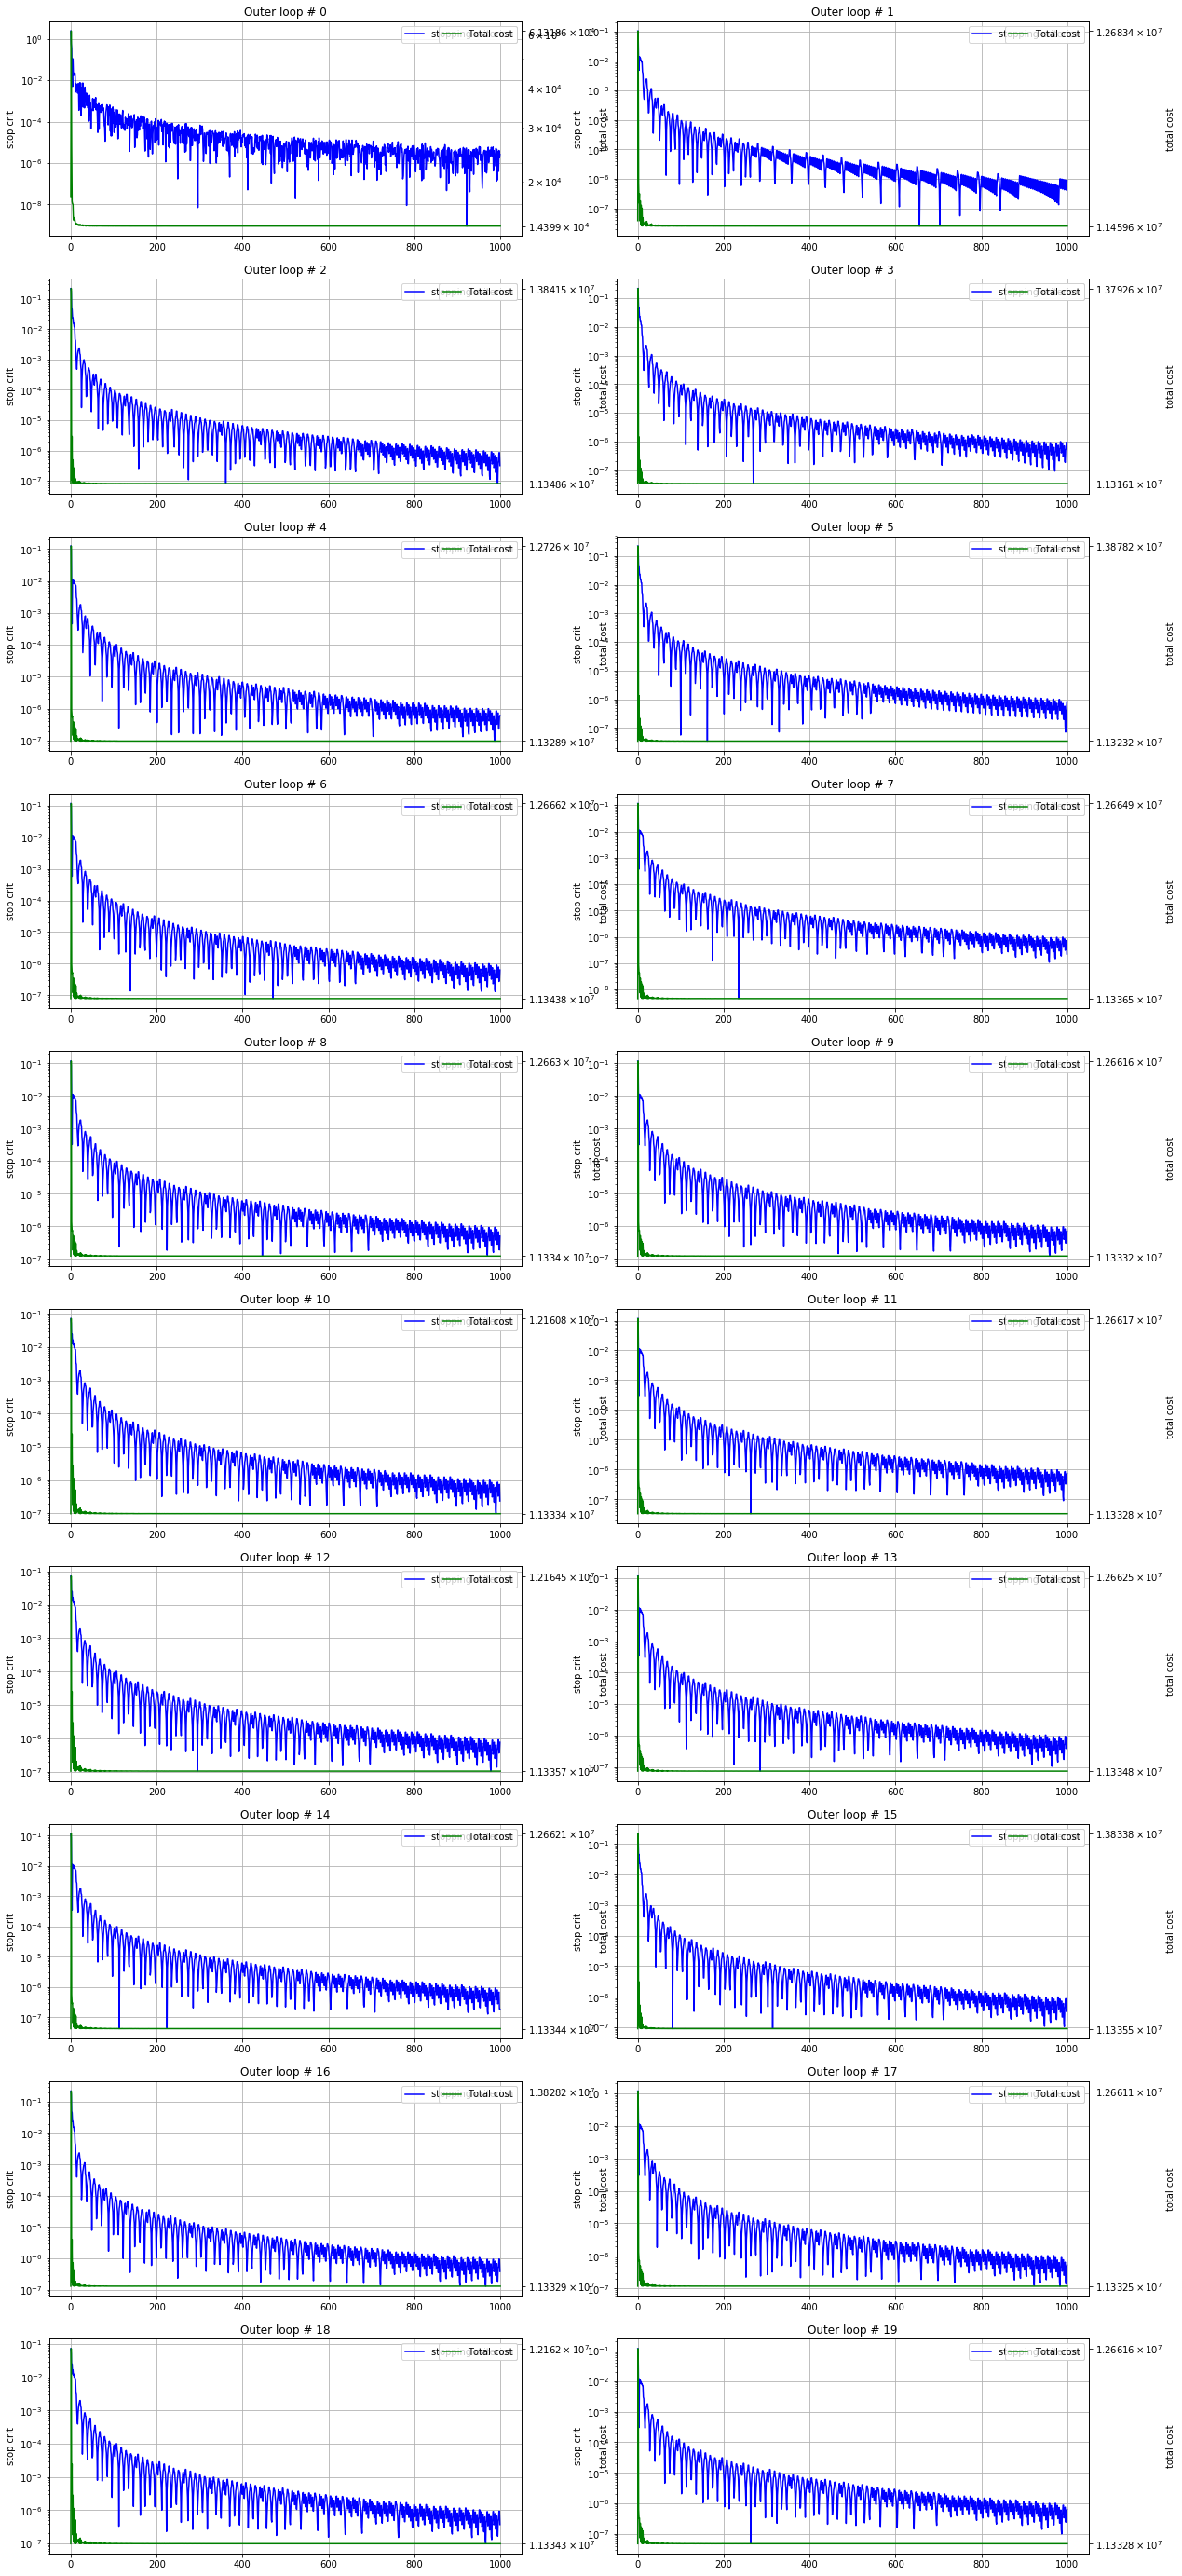

In [9]:
plot_stop_and_cost(opt_res)

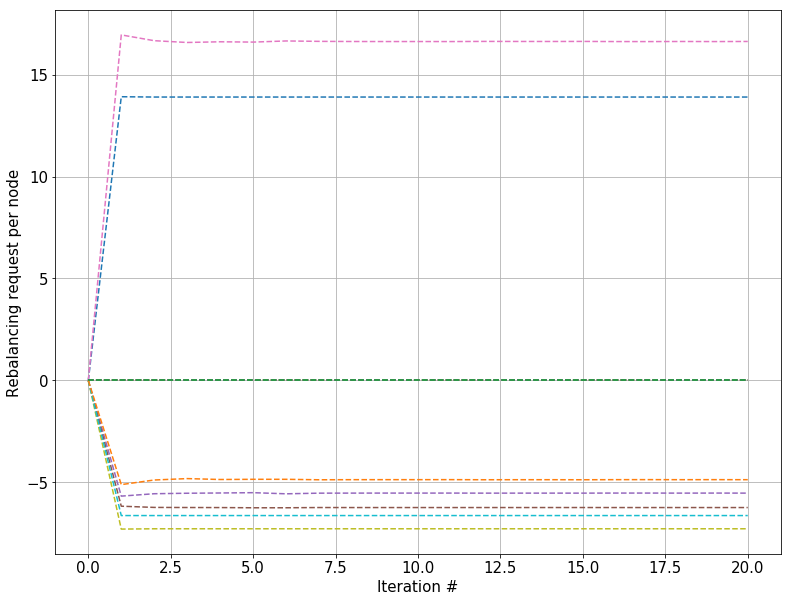

In [10]:
plot_ri_list(ri_FW, save = False, path = None)

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

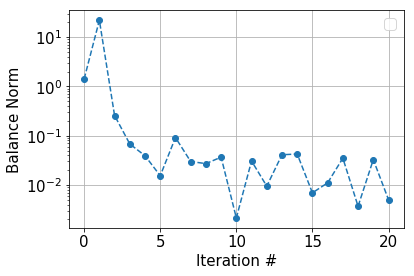

In [12]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

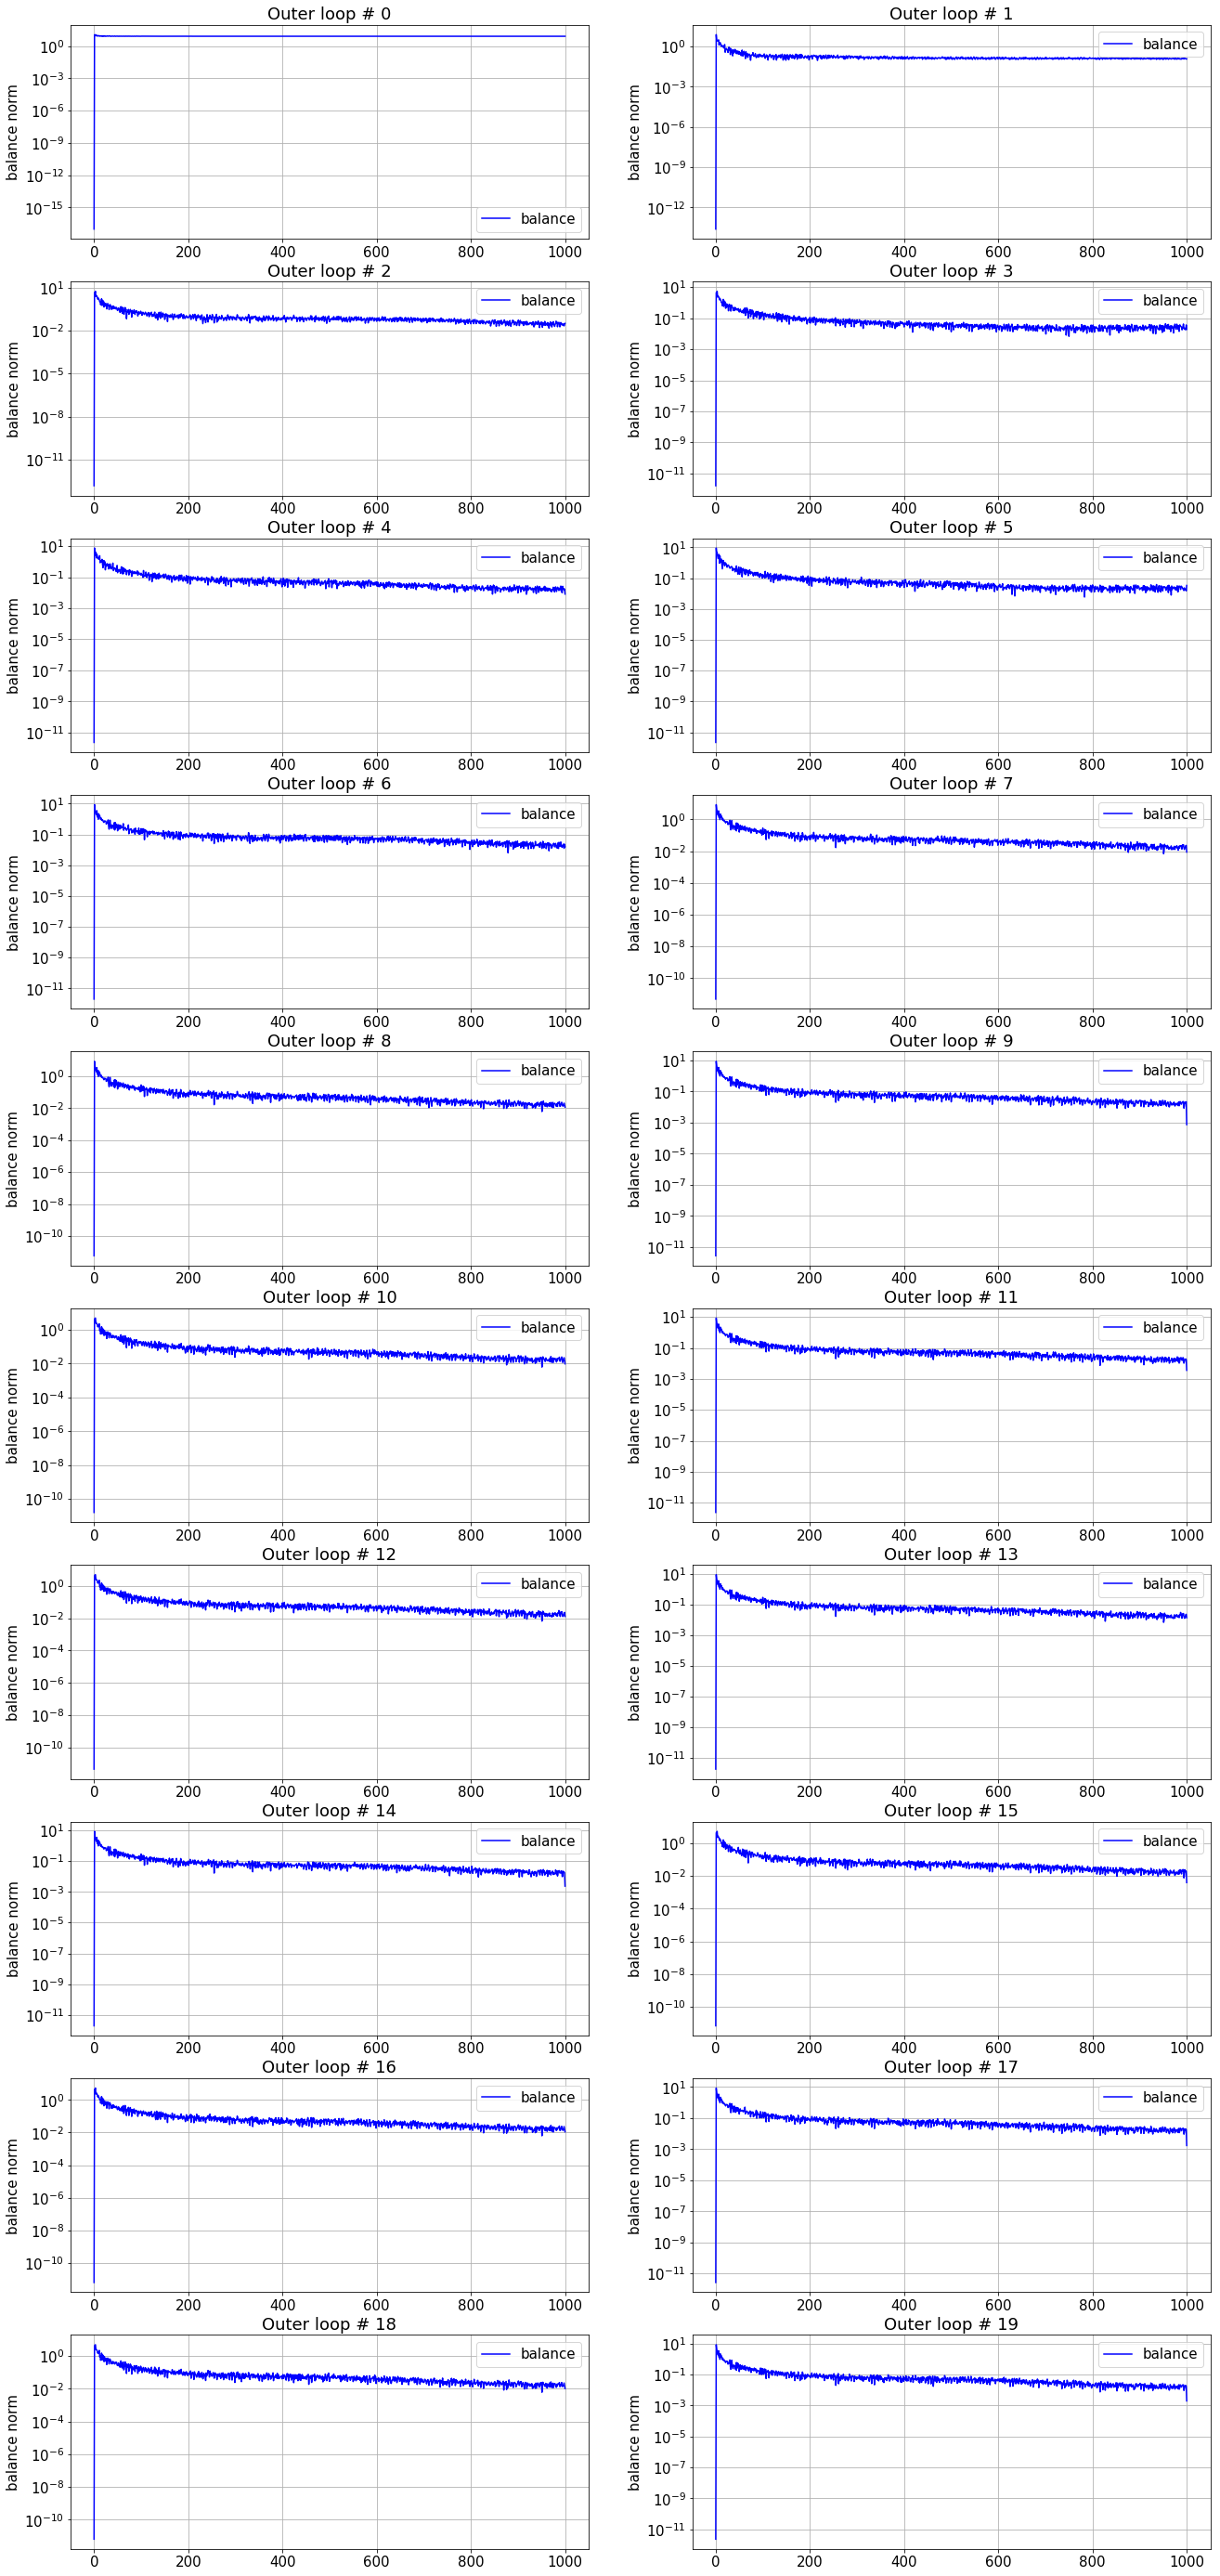

In [11]:
plot_balance_list(balance_list, b_scale='log')

We see indeed that there is a drop in the beginning, but even for the first iteraion. This does not make any sense to me of course. 

## Trying to make sense of the drop in balance

In [17]:
OD_list[0]

{('0', '0_p'): 20, ('5', '5_p'): 30}

In [16]:
balance_list[0]

[9.85367065002228e-18,
 10.749676997731397,
 11.714188927203718,
 9.197825830053533,
 10.38374798530002,
 9.95454521922232,
 8.661726744944199,
 9.677675723406287,
 8.835953489809352,
 8.789550520197688,
 9.460905009544948,
 8.785372757627693,
 8.729453424039672,
 8.221866757040129,
 8.8967066316075,
 8.830205807458631,
 8.378921821951344,
 8.904380160740489,
 8.01394214466644,
 8.543950665267298,
 8.967519667546735,
 8.18773534862963,
 8.623036169646324,
 9.014482175304853,
 8.321060469512169,
 8.080105595083987,
 8.437776670300895,
 8.446652819147822,
 8.790889962553829,
 8.523961858887304,
 8.314546439355285,
 8.608036844957775,
 8.60990614497954,
 8.877281650968824,
 8.652022630046048,
 8.18434573112464,
 8.029100225359452,
 8.305386215696672,
 8.568283564093452,
 8.539753767415688,
 8.367721541816277,
 8.22319352285011,
 8.23443075959225,
 8.458582481127783,
 8.661689984789993,
 8.29310743224574,
 8.15638489815869,
 8.380211406528096,
 8.378891786617434,
 8.24405211243857,
 8.4331

In [33]:
from amod_ed.routines_icu import check_flow_cons_at_OD_nodes, check_flow_cons

In [22]:
G_ref = G_FW[1][0]

In [25]:
check_flow_cons_at_OD_nodes(G_ref, OD_list[1][0])

array([-3.34203947e-18, -3.25181290e-18, -3.27900419e-18, -3.58784233e-18,
       -3.19391924e-18, -3.17568579e-18, -3.25104796e-18, -3.30199927e-18,
       -3.17568579e-18,  2.95590369e-17])

In [26]:
for e in G_ref.edges():
    print(e, G_ref[e[0]][e[1]]['f_m'] + G_ref[e[0]][e[1]]['f_r'])

('0', '1') 2.8465530977093656e-12
('0', '2') 2.846556231237011e-12
('0', '3') 2.8465724818599537e-12
('0', '7') 2.8465578452643392e-12
('0', 'R') 0
('0', '0_p') 20
('1', '0') 2.846565894813083e-12
('1', '4') 2.8465547236168923e-12
('2', '0') 2.8465627612891578e-12
('2', '6') 2.8465578707363277e-12
('3', '0') 2.8465465106653524e-12
('3', '9') 2.8390326201666647e-12
('3', '5_p') 0
('4', '1') 2.846564268907713e-12
('4', '5') 2.8465579084204045e-12
('4', '8') 2.8465579084204045e-12
('4', '5_p') 0
('5', '4') 2.8465610841061956e-12
('5', 'R') 0
('5', '5_p') 30
('6', '2') 2.846561121784287e-12
('6', '0_p') 0
('7', '0') 2.846561147263609e-12
('7', '0_p') 0
('8', '4') 2.8465610841061956e-12
('9', '3') 2.8390030611297346e-12
('9', '5_p') 0


part of the answer is that at the beginning we might have assigned everything to dummy edges (in which case the balance will be close to zero because of dummy edge assignment). 

However, that should be the case for the first iteration only. 

If we now look at, say, the second iteration. There, there should be a NN initialization. This is indeed what we notice a few cells down. 

But I have a hard time believing that everything is as well balanced as it looks. 

In [55]:
G_ref = G_FW[2][0]

In [30]:
balance_list[1][0]

2.4227406353778924e-14

In [34]:
net_flow, l = check_flow_cons(G_ref, OD_list[1][0])

In [38]:
for kn in net_flow:
    print(kn, net_flow[kn])

0 -1.0658141036401503e-14
0_p 0
1 -1.0658141036401503e-14
2 1.9539925233402755e-14
3 2.7533531010703882e-14
4 -3.1076486869952014e-14
5 -3.197442310920451e-14
5_p 0
6 3.019806626980426e-14
7 1.509903313490213e-14
8 -2.9690442812646545e-14
9 2.220446049250313e-14
R 0


In [56]:
for e in G_FW[1][-1].edges():
    print(e, G_FW[1][-1][e[0]][e[1]]['f_m'],  G_FW[1][-1][e[0]][e[1]]['f_r'])

('0', '1') 0.0 5.6760666433553786e-18
('0', '2') 7.288280581693759 5.676072891653291e-18
('0', '3') 10.77880203628707 5.676105295622439e-18
('0', '7') 6.624712612736567 5.6760761100463154e-18
('0', 'R') 0.0 0
('0', '0_p') 6.087006805569675 0.0
('1', '0') 10.77880203628707 5.6760921609589644e-18
('1', '4') 0.0 5.676069885437702e-18
('2', '0') 0.0 5.676085912668494e-18
('2', '6') 7.288280581693759 5.676076160837822e-18
('3', '0') 0.0 5.676053508697599e-18
('3', '9') 5.107168280820976 5.661070706073708e-18
('3', '5_p') 5.671633755466091 0.0
('4', '1') 10.77880203628707 5.676088918880959e-18
('4', '5') 0.0 5.676076235980419e-18
('4', '8') 0.0 5.676076235980419e-18
('4', '5_p') 6.165630776409216 0.0
('5', '4') 16.94443281269628 5.676082568342227e-18
('5', 'R') 0.0 0
('5', '5_p') 13.055567187303707 0.0
('6', '2') 0.0 5.676082643472864e-18
('6', '0_p') 7.288280581693759 0.0
('7', '0') 0.0 5.676082694278997e-18
('7', '0_p') 6.624712612736567 0.0
('8', '4') 0.0 5.676082568342227e-18
('9', '3') 

In [44]:
for e in G_ref.edges():
    print(e, G_ref[e[0]][e[1]]['f_m'],  G_ref[e[0]][e[1]]['f_r'])

('0', '1') 0.0 10.778802047607611
('0', '2') 7.288280581693759 1.8379020400007595e-08
('0', '3') 10.77880203628707 1.1320641698498625e-08
('0', '7') 6.624712612736567 2.0562371174257575e-08
('0', 'R') 0.0 15.428713003563274
('0', '0_p') 6.087006805569675 0
('1', '0') 10.77880203628707 1.1320641698429193e-08
('1', '4') 0.0 10.778802047607622
('2', '0') 0.0 7.28828060007273
('2', '6') 7.288280581693759 1.8379020400093457e-08
('3', '0') 0.0 10.778802047607662
('3', '9') 5.107168280820976 2.7689775212528523e-08
('3', '5_p') 5.671633755466091 0
('4', '1') 10.77880203628707 1.1320641698398945e-08
('4', '5') 0.0 16.944432818656132
('4', '8') 0.0 0.0004931758707403433
('4', '5_p') 6.165630776409216 0
('5', '4') 16.94443281269628 5.959882345991926e-09
('5', 'R') 0.0 15.428713003563274
('5', '5_p') 13.055567187303707 0
('6', '2') 0.0 7.288280600072749
('6', '0_p') 7.288280581693759 0
('7', '0') 0.0 6.624712633298923
('7', '0_p') 6.624712612736567 0
('8', '4') 0.0 0.0004931758707700338
('9', '3')

I can understand that 
- R and _p nodes are balanced (simply because not really considered in the net flow computaiton)
- intermediary nodes are balanced

However, I cannot believe that 0 and 5 are balanced perfectly here. 

In [60]:
for e in G_ref.edges():
    if '0' in e:
        print(e, G_ref[e[0]][e[1]]['f_m'], G_ref[e[0]][e[1]]['f_r'])

('0', '1') 0.0 10.778802047607611
('0', '2') 7.288280581693759 1.8379020400007595e-08
('0', '3') 10.77880203628707 1.1320641698498625e-08
('0', '7') 6.624712612736567 2.0562371174257575e-08
('0', 'R') 0.0 15.428713003563274
('0', '0_p') 6.087006805569675 0
('1', '0') 10.77880203628707 1.1320641698429193e-08
('2', '0') 0.0 7.28828060007273
('3', '0') 0.0 10.778802047607662
('7', '0') 0.0 6.624712633298923


In [59]:
for e in G_ref.edges():
    if '5' in e:
        print(e, G_ref[e[0]][e[1]]['f_m'], G_ref[e[0]][e[1]]['f_r'])

('4', '5') 0.0 16.944432818656132
('5', '4') 16.94443281269628 5.959882345991926e-09
('5', 'R') 0.0 15.428713003563274
('5', '5_p') 13.055567187303707 0


In [61]:
for e in G_FW[2][1].edges():
    if '5' in e:
        print(e, G_FW[2][1][e[0]][e[1]]['f_m'], G_FW[2][1][e[0]][e[1]]['f_r'])

('4', '5') 0.0 26.21976161096978
('5', '4') 25.64814427089876 1.9866274486639757e-09
('5', 'R') 0.0 25.714521672605493
('5', '5_p') 4.351855729101236 0.0


# NO = 100

Here we solve as before, just to control and provide a good baseline

In [3]:
n_nodes=10

In [4]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [5]:
print(os.listdir(path))

['init_nearest_with_step.pkl', 'ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'no_to_100_withCarriedOverStepSize.pkl', 'ni_to_5000.pkl', 'init_nearest_with_step_decrease.pkl', 'init_nearest.pkl']


In [6]:
filename=os.listdir(path)[4]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

no_to_100_withCarriedOverStepSize.pkl


In [7]:
params

{'L': 10000,
 'ni': 1000,
 'no': 100,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

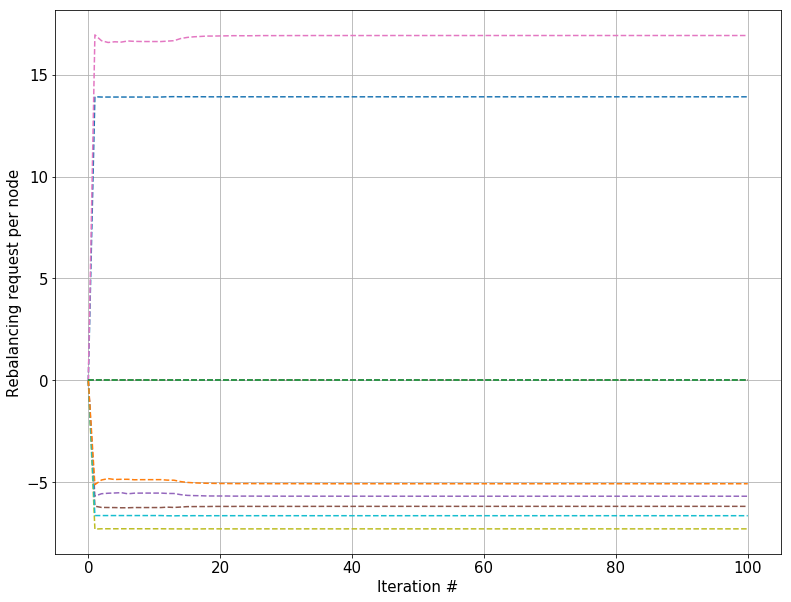

In [9]:
plot_ri_list(ri_FW, save = False, path = None)

No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

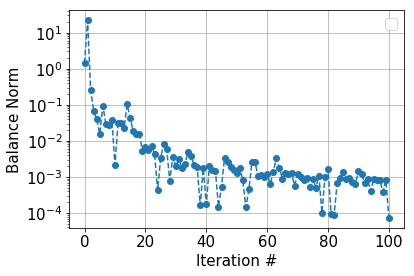

In [11]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
# plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

# NO = 500

Here we solve as before, just to control and provide a good baseline

In [62]:
n_nodes=10

In [63]:
path='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [64]:
print(os.listdir(path))

['init_nearest_with_step.pkl', 'ni_to_10000.pkl', 'init_passengers.pkl', 'initial_setup.pkl', 'no_to_100_withCarriedOverStepSize.pkl', 'no_to_500_withCarriedOverStepSize.pkl', 'ni_to_5000.pkl', 'init_nearest_with_step_decrease.pkl', 'init_nearest.pkl']


In [65]:
filename=os.listdir(path)[5]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list, params = pickle.load(f)

no_to_500_withCarriedOverStepSize.pkl


In [66]:
params

{'L': 10000,
 'ni': 1000,
 'no': 500,
 'ev': False,
 'sc': 'relative_progress',
 'fu': False,
 'ri_smoothing': False,
 'update_factor': False,
 'FW_tol': 0,
 'tol': 0}

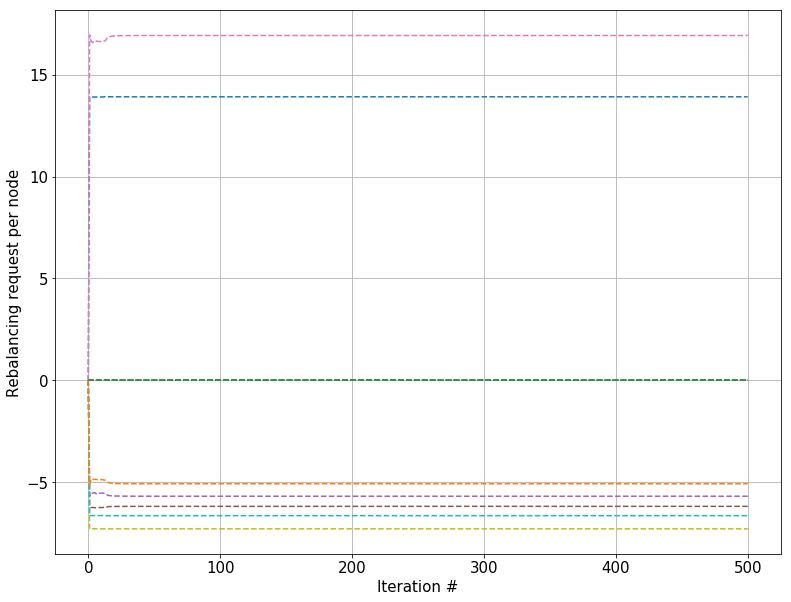

In [67]:
plot_ri_list(ri_FW, save = False, path = None)

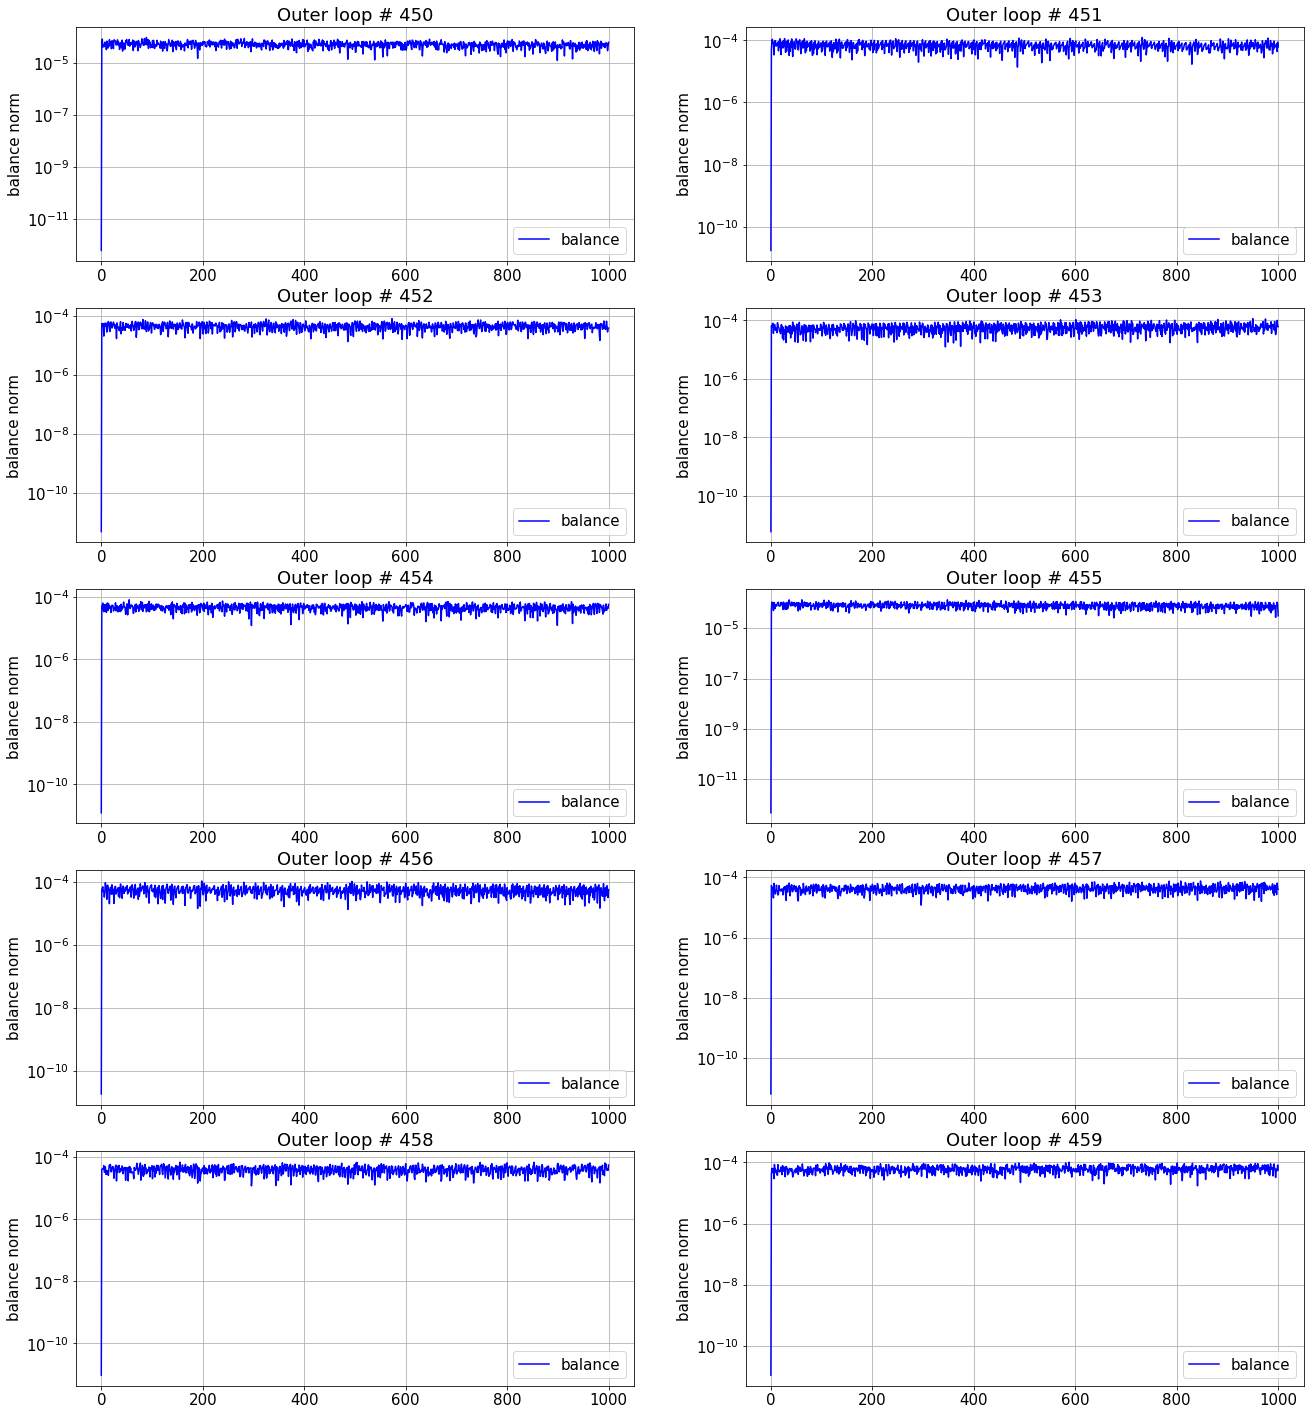

In [68]:
plot_balance_list(balance_list, b_scale='log', n_lims = [450, 460])



No handles with labels found to put in legend.


Text(0, 0.5, 'Balance Norm')

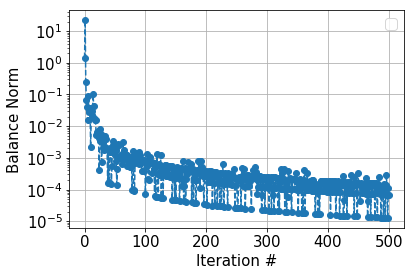

In [69]:
b=np.linalg.norm(balance, axis=1)
plt.plot(np.array(b), 'o--')
plt.grid(True)
plt.legend()
plt.yscale('log')
# plt.xticks(np.arange(0, 21, step=5))
plt.xlabel('Iteration #')
plt.ylabel('Balance Norm')

In this case we are at step size ~ 1/500000. 